# Project 2

In this project, you will implement the exploratory analysis plan developed in Project 1. This will lay the groundwork for our our first modeling exercise in Project 3.

### Step 1: Load the python libraries you will need for this project 

In [1]:
#imports
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as pl
import numpy as np
%matplotlib inline

### Step 2: Read in your data set 

In [3]:
#Read in data from source 
df_raw = pd.read_csv("../DAT-NYC-9-27/projects/unit-projects/project-2/assets/admissions.csv")
print df_raw.head()

   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0


## Questions
#### Question 1. How many observations are in our dataset? 


In [3]:
df_raw.count()

admit       400
gre         398
gpa         398
prestige    399
dtype: int64

Answer: There are 400 obserations with null values in the "gre", "gpa", and "prestige" columns.

#### Question 2. Create a summary table

In [6]:
#function
df_raw.describe()

/Users/mikaelroussel/anaconda/lib/python2.7/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,NaN,NaN,NaN
50%,0.000000,NaN,NaN,NaN
75%,1.000000,NaN,NaN,NaN
max,1.000000,800.000000,4.00000,4.000000


#### Question 3. Why would GRE have a larger STD than GPA?

Answer: Because there is a wider range of possible scores on the gre than with GPA.

#### Question 4. Drop data points with missing data


In [16]:
new_df = df_raw.dropna()
new_df.describe()


,admit,gre,gpa,prestige
count,397.000000,397.000000,397.000000,397.000000
mean,0.317380,587.858942,3.392242,2.488665
std,0.466044,115.717787,0.380208,0.947083
min,0.000000,220.000000,2.260000,1.000000
25%,0.000000,520.000000,3.130000,2.000000
50%,0.000000,580.000000,3.400000,2.000000
75%,1.000000,660.000000,3.670000,3.000000
max,1.000000,800.000000,4.000000,4.000000


In [17]:
new_df.isnull().sum()

admit       0
gre         0
gpa         0
prestige    0
dtype: int64

#### Question 5. Confirm that you dropped the correct data. How can you tell? 

Answer: I can tell that there are no null values left because the count for null is now 0 for all columns.

#### Question 6. Create box plots for GRE and GPA

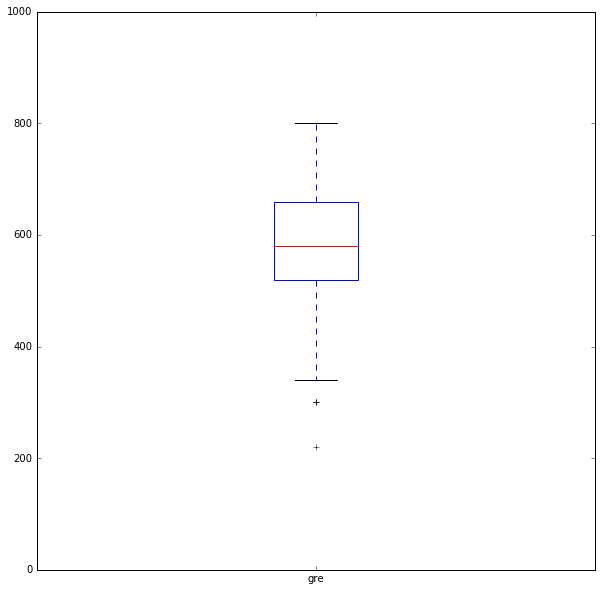

In [18]:
#boxplot 1
new_df['gre'].plot(kind="box",
              figsize=(10,10), ylim=(0,1000))

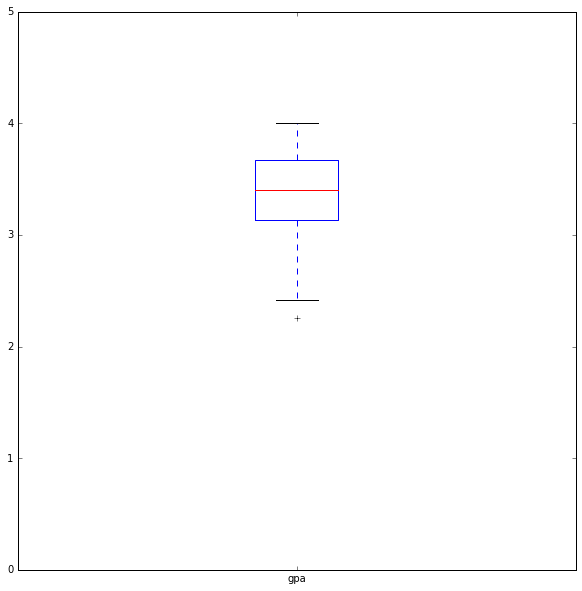

In [19]:
#boxplot 2 
new_df['gpa'].plot(kind="box",
              figsize=(10,10), ylim=(0,5))

#### Question 7. What do this plots show?

Answer: 

They show several things:
* gre scores have a much larger range of values than gpa.
* gre has two low outliers and gpa has one.
* The median for gre is just below 600 and for gpa it lies around 3.5.
* Both plots show a pretty symmetrical distribution, but gpa looks like it is slightly skewed to the left.

#### Question 8. Describe each distribution 

In [ ]:
# plot the distribution of each variable 


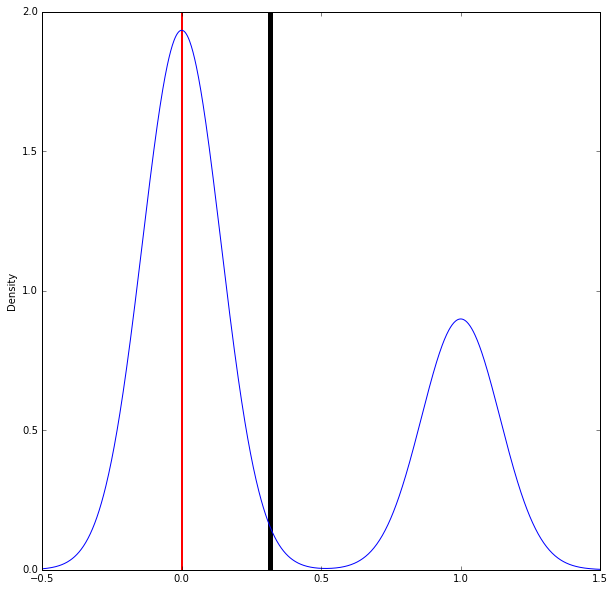

In [34]:
new_df['admit'].plot(kind="density",
              figsize=(10,10), ylim=(0,2))

plt.vlines(new_df['admit'].mean(),     
           ymin=0, 
           ymax=2,
           linewidth=5.0)

plt.vlines(new_df['admit'].median(),   
           ymin=0, 
           ymax=2, 
           linewidth=2.0,
           color="red")

The probability distribution for the 'admit' variable shows that there are only two possible values here (1 and 0). This does not look like a normal distribution.

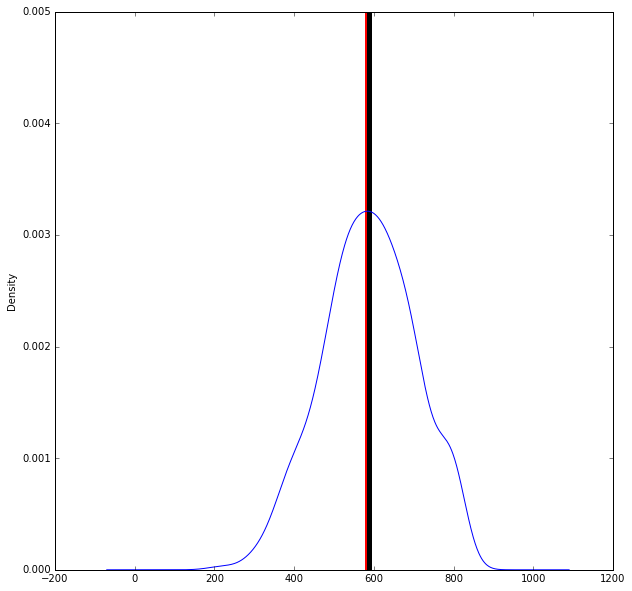

In [24]:
new_df['gre'].plot(kind="density",
              figsize=(10,10), ylim=(0,0.005))

plt.vlines(new_df['gre'].mean(),     
           ymin=0, 
           ymax=0.005,
           linewidth=5.0)

plt.vlines(new_df['gre'].median(),   
           ymin=0, 
           ymax=0.005, 
           linewidth=2.0,
           color="red")

The probability distribution for 'gre' shows that this is a relatively normal distribution with a good amount of symmetry around the media. The mean and median are very close to each other, which implies there isn't a lot of skewness. 

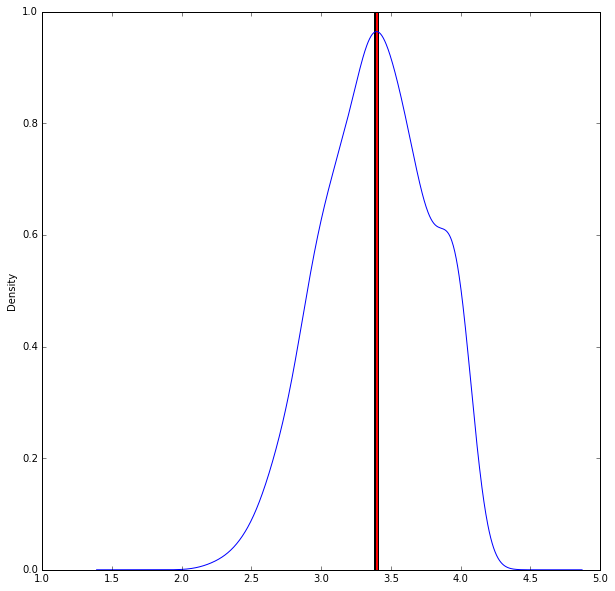

In [25]:
new_df['gpa'].plot(kind="density",
              figsize=(10,10), ylim=(0,1.0))

plt.vlines(new_df['gpa'].mean(),     
           ymin=0, 
           ymax=1.0,
           linewidth=5.0)

plt.vlines(new_df['gpa'].median(),   
           ymin=0, 
           ymax=1.0, 
           linewidth=2.0,
           color="red")

The density plot for 'gpa' also shows a relatively normal distribution with symmetry around the mean. There is also a little more visible skewness to the left compared to the 'gre'plot.

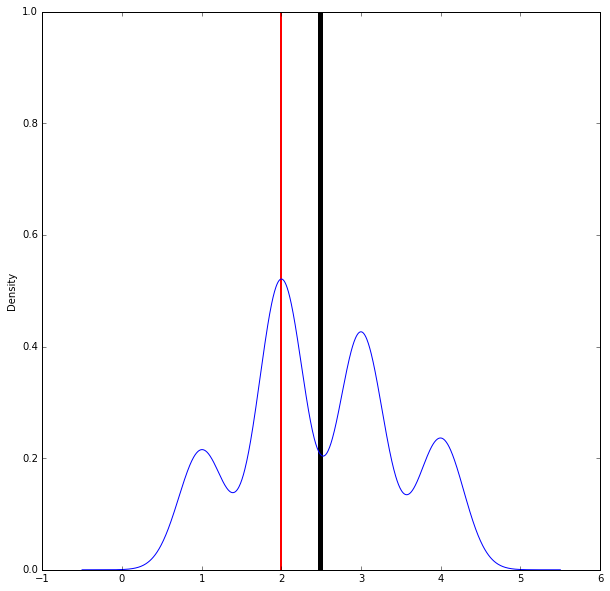

In [26]:
new_df['prestige'].plot(kind="density",
              figsize=(10,10), ylim=(0,1.0))

plt.vlines(new_df['prestige'].mean(),     
           ymin=0, 
           ymax=1.0,
           linewidth=5.0)

plt.vlines(new_df['prestige'].median(),   
           ymin=0, 
           ymax=1.0, 
           linewidth=2.0,
           color="red")

Like the density plot for 'admit', the 'prestige' varibale does not seem to have a normal distribution. There is no central tendency with symmetry around the mean.

#### Question 9.  If our model had an assumption of a normal distribution would we meet that requirement? 

Answer: We would meet that requirement for only the 'gre' and 'gpa' variables.

#### Question 10.  Does this distribution need correction? If so, why? How? 

Answer: The distributions for 'admit' and 'gre' could use a correction by displaying the distribution in terms of a histogram showing the actual frequency of each value. This gives a clearer picture of the distributon for these variables. See code below for this correction.

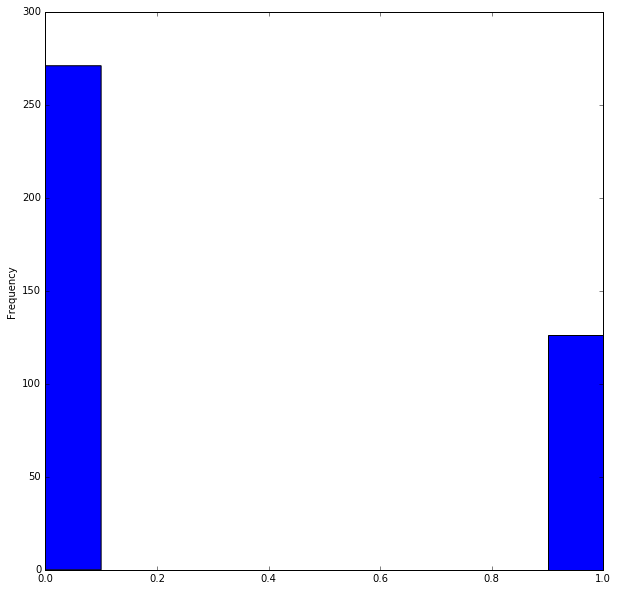

In [35]:
new_df['admit'].plot(kind="hist",
              figsize=(10,10), ylim=(0,300))



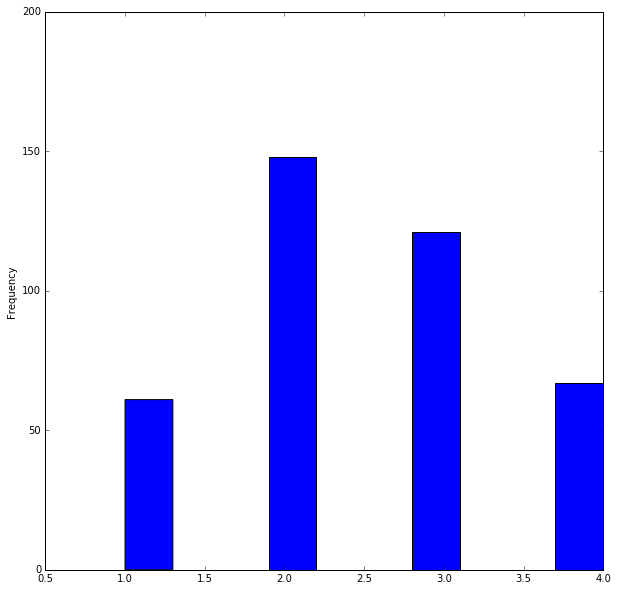

In [36]:
new_df['prestige'].plot(kind="hist",
              figsize=(10,10), ylim=(0,200))

#### Question 11. Which of our variables are potentially colinear? 

In [37]:
# create a correlation matrix for the data
new_df.corr()


,admit,gre,gpa,prestige
admit,1.000000,0.181202,0.174116,-0.243563
gre,0.181202,1.000000,0.382408,-0.124533
gpa,0.174116,0.382408,1.000000,-0.060976
prestige,-0.243563,-0.124533,-0.060976,1.000000


#### Question 12. What did you find?

Answer: Based on looking at the correlation matrix for the different predictor variables, it looks like only 'gpa' and 'gre' have a decently strong correlation, but it's probably not strong enough to say that there is collinearity.

#### Question 13. Write an analysis plan for exploring the association between grad school admissions rates and prestige of  undergraduate schools.

Answer: Since admission rate is a classification problem we will need to carry out an analysis by using a logistic regression model. We can use python code to fit a logistic regression model for the prestige as the predictor variable and admission as the outcome. The probability of either 1 or 0 for 'admit' will be determined. I'll then determine how well the model model looks by seeing how high the coefficient number is for prestige and whether the p-value is low enough. 

#### Question 14. What is your hypothesis? 

Answer: I hypothesize that the probability of being admitted will decrease as the number for 'prestige' increases.I think there will be a relatively strong association.

## Bonus/Advanced

#### 1. Bonus: Explore alternatives to dropping obervations with missing data

#### 2. Bonus: Log transform the skewed data

#### 3. Advanced: Impute missing data